In [2]:
# Imports
import sqlite3
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load in data set
satellite_df = pd.read_csv('data/UCS-Satellite-DB.csv')
satellite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Current Official Name of Satellite  7560 non-null   object
 1   Country of Operator/Owner           7560 non-null   object
 2   Users                               7560 non-null   object
 3   Purpose                             7560 non-null   object
 4   Detailed Purpose                    1254 non-null   object
 5   Class of Orbit                      7560 non-null   object
 6   Date of Launch                      7559 non-null   object
 7   Launch Site                         7560 non-null   object
 8   Unnamed: 8                          484 non-null    object
 9   Unnamed: 9                          484 non-null    object
 10  Unnamed: 10                         484 non-null    object
 11  Unnamed: 11                         484 non-null    obje

In [4]:
# Only keep certain columns
satellite_df = satellite_df[['Current Official Name of Satellite', 'Country of Operator/Owner', 'Users', 'Purpose', 'Class of Orbit', 'Date of Launch', 'Launch Site']]
satellite_df

,Current Official Name of Satellite,Country of Operator/Owner,Users,Purpose,Class of Orbit,Date of Launch,Launch Site
0,1HOPSAT-TD,USA,Commercial,Earth Observation,LEO,12/11/2019,Satish Dhawan Space Centre
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,Commercial,Earth Observation,LEO,1/3/2023,Cape Canaveral
2,Aalto-1,Finland,Civil,Technology Development,LEO,6/23/2017,Satish Dhawan Space Centre
3,AAt-4,Denmark,Civil,Earth Observation,LEO,4/25/2016,Guiana Space Center
4,ABS-2,Multinational,Commercial,Communications,GEO,2/6/2014,Guiana Space Center
...,...,...,...,...,...,...,...
7555,Ziyuan 1-02C,China,Government,Earth Observation,LEO,12/22/2011,Taiyuan Launch Center
7556,Ziyuan 1-2D,China,Government,Earth Observation,LEO,9/14/2019,Taiyuan Launch Center
7557,Ziyuan 3,China,Government,Earth Observation,LEO,1/9/2012,Taiyuan Launch Center
7558,Ziyuan 3-2,China,Government,Earth Observation,LEO,5/29/2016,Taiyuan Launch Center


In [5]:
# Rename Columns to be more concise & SQL friendly
satellite_df = satellite_df.rename(columns={
    'Current Official Name of Satellite': 'Satellite_Name',
    'Country of Operator/Owner': 'Operator_Country',
    'Purpose': 'Mission',
    'Class of Orbit': 'Orbit',
    'Launch Site': 'Launch_Site'})
satellite_df

,Satellite_Name,Operator_Country,Users,Mission,Orbit,Date of Launch,Launch_Site
0,1HOPSAT-TD,USA,Commercial,Earth Observation,LEO,12/11/2019,Satish Dhawan Space Centre
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,Commercial,Earth Observation,LEO,1/3/2023,Cape Canaveral
2,Aalto-1,Finland,Civil,Technology Development,LEO,6/23/2017,Satish Dhawan Space Centre
3,AAt-4,Denmark,Civil,Earth Observation,LEO,4/25/2016,Guiana Space Center
4,ABS-2,Multinational,Commercial,Communications,GEO,2/6/2014,Guiana Space Center
...,...,...,...,...,...,...,...
7555,Ziyuan 1-02C,China,Government,Earth Observation,LEO,12/22/2011,Taiyuan Launch Center
7556,Ziyuan 1-2D,China,Government,Earth Observation,LEO,9/14/2019,Taiyuan Launch Center
7557,Ziyuan 3,China,Government,Earth Observation,LEO,1/9/2012,Taiyuan Launch Center
7558,Ziyuan 3-2,China,Government,Earth Observation,LEO,5/29/2016,Taiyuan Launch Center


In [68]:
# Convert Launch Date to DateTime
satellite_df['Launch_Date'] = pd.to_datetime(satellite_df['Date of Launch'], yearfirst=True)

# Create a new column to store the year
satellite_df['Launch_Year'] = satellite_df['Launch_Date'].dt.year.convert_dtypes()

# Only keep missions that were launched between 2015 to Present
sats2015_df = satellite_df[satellite_df['Launch_Year'] >= 2013]
sats2015_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6920 entries, 0 to 7559
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Satellite_Name    6920 non-null   object        
 1   Operator_Country  6920 non-null   object        
 2   Users             6920 non-null   object        
 3   Mission           6920 non-null   object        
 4   Orbit             6920 non-null   object        
 5   Date of Launch    6920 non-null   object        
 6   Launch_Site       6920 non-null   object        
 7   Launch_Date       6920 non-null   datetime64[ns]
 8   Launch_Year       6920 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), object(7)
memory usage: 547.4+ KB


In [69]:
# Check for null values
sats2015_df.isnull().sum()

Satellite_Name      0
Operator_Country    0
Users               0
Mission             0
Orbit               0
Date of Launch      0
Launch_Site         0
Launch_Date         0
Launch_Year         0
dtype: int64

In [70]:
# Moving on to Missions, get an idea of Mission Categories
sats2015_df.groupby('Mission').size()

Mission
Communications                                    5175
Communications/Maritime Tracking                     3
Communications/Technology Development                1
Earth Observation                                 1076
Earth Observation                                    3
Earth Observation/Communications                     1
Earth Observation/Communications/Space Science       1
Earth Observation/Earth Science                      1
Earth Observation/Navigation                         9
Earth Observation/Space Science                      1
Earth Observation/Technology Development             3
Earth Science                                       26
Earth Science/Earth Observation                      1
Earth/Space Observation                              4
Educational                                          1
Meteorological                                       6
Mission Extension Technology                         2
Navigation/Global Positioning                       91
Na

In [71]:
# Create a new column for Primary Mission and create a function that will pull primary mission from Mission List
def primary_mission(mission):
    primary_msns = [
    'Communications',
    'Earth Observation',
    'Navigation',
    'Meteorological',
    'Space Observation',
    'Space Science',
    'Technology Development',
    'Unknown'
    ] 
    
    if pd.isnull(mission):
        return 'Unknown'
    
    missions = [m.strip().title() for m in mission.split('/')]

    for m in missions:
        if m in primary_msns:
            return m
    return 'Unknown'

sats2015_df['Primary_Mission'] = sats2015_df['Mission'].apply(primary_mission)
sats2015_df

C:\Users\thatc\AppData\Local\Temp\ipykernel_15356\4177998566.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Satellite_Name,Operator_Country,Users,Mission,Orbit,Date of Launch,Launch_Site,Launch_Date,Launch_Year,Primary_Mission
0,1HOPSAT-TD,USA,Commercial,Earth Observation,LEO,12/11/2019,Satish Dhawan Space Centre,2019-12-11,2019,Earth Observation
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,Commercial,Earth Observation,LEO,1/3/2023,Cape Canaveral,2023-01-03,2023,Earth Observation
2,Aalto-1,Finland,Civil,Technology Development,LEO,6/23/2017,Satish Dhawan Space Centre,2017-06-23,2017,Technology Development
3,AAt-4,Denmark,Civil,Earth Observation,LEO,4/25/2016,Guiana Space Center,2016-04-25,2016,Earth Observation
4,ABS-2,Multinational,Commercial,Communications,GEO,2/6/2014,Guiana Space Center,2014-02-06,2014,Communications
...,...,...,...,...,...,...,...,...,...,...
7553,OHS-3,China,Commercial,Earth Observation,LEO,4/26/2018,Jiuquan Satellite Launch Center,2018-04-26,2018,Earth Observation
7554,OHS-4,China,Commercial,Earth Observation,LEO,4/26/2018,Jiuquan Satellite Launch Center,2018-04-26,2018,Earth Observation
7556,Ziyuan 1-2D,China,Government,Earth Observation,LEO,9/14/2019,Taiyuan Launch Center,2019-09-14,2019,Earth Observation
7558,Ziyuan 3-2,China,Government,Earth Observation,LEO,5/29/2016,Taiyuan Launch Center,2016-05-29,2016,Earth Observation


In [72]:
sats2015_df.groupby('Primary_Mission').size()

Primary_Mission
Communications            5179
Earth Observation         1096
Meteorological               6
Navigation                 103
Space Observation           12
Space Science               64
Technology Development     337
Unknown                    123
dtype: int64

In [73]:
# Check consistencies in Orbits, make them all upper case
sats2015_df['Orbit'] = sats2015_df['Orbit'].str.strip().str.upper()
sats2015_df.groupby('Orbit').size()

C:\Users\thatc\AppData\Local\Temp\ipykernel_15356\641348949.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Orbit
ELLIPTICAL      29
GEO            309
LEO           6482
MEO            100
dtype: int64

In [74]:
# Assign Frequency Bands to Each Satellite
frequency_band_mapping = {
    'Communications': 'C/Ku/Ka',
    'Earth Observation': 'X/S',
    'Navigation': 'L',
    'Meteorological': 'S/X',
    'Space Observation': 'S/X/Ka',
    'Space Science': 'S/X/Ka',
    'Technology Development': 'S/X/Ka/Ku',
    'Other' : 'Other',
    'Unknown': 'Other'
}

sats2015_df['Frequency_Band'] = sats2015_df['Primary_Mission'].map(frequency_band_mapping)
sats2015_df.groupby('Frequency_Band').size()

C:\Users\thatc\AppData\Local\Temp\ipykernel_15356\2921176721.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Frequency_Band
C/Ku/Ka      5179
L             103
Other         123
S/X             6
S/X/Ka         76
S/X/Ka/Ku     337
X/S          1096
dtype: int64

In [75]:
# Put rows that I want to keep into new dataframe.
finalsats_df = sats2015_df[['Satellite_Name', 'Operator_Country', 'Users', 'Orbit', 'Launch_Site', 'Launch_Year', 'Primary_Mission', 'Frequency_Band']]
finalsats_df

,Satellite_Name,Operator_Country,Users,Orbit,Launch_Site,Launch_Year,Primary_Mission,Frequency_Band
0,1HOPSAT-TD,USA,Commercial,LEO,Satish Dhawan Space Centre,2019,Earth Observation,X/S
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,Commercial,LEO,Cape Canaveral,2023,Earth Observation,X/S
2,Aalto-1,Finland,Civil,LEO,Satish Dhawan Space Centre,2017,Technology Development,S/X/Ka/Ku
3,AAt-4,Denmark,Civil,LEO,Guiana Space Center,2016,Earth Observation,X/S
4,ABS-2,Multinational,Commercial,GEO,Guiana Space Center,2014,Communications,C/Ku/Ka
...,...,...,...,...,...,...,...,...
7553,OHS-3,China,Commercial,LEO,Jiuquan Satellite Launch Center,2018,Earth Observation,X/S
7554,OHS-4,China,Commercial,LEO,Jiuquan Satellite Launch Center,2018,Earth Observation,X/S
7556,Ziyuan 1-2D,China,Government,LEO,Taiyuan Launch Center,2019,Earth Observation,X/S
7558,Ziyuan 3-2,China,Government,LEO,Taiyuan Launch Center,2016,Earth Observation,X/S


In [76]:
finalsats_df.groupby('Users').size()

Users
Civil                     145
Civil/Commercial            1
Civil/Government            4
Civil/Military              3
Commercial               5826
Commercial                  1
Commercial/Civil            4
Commercial/Government       1
Commercial/Military         2
Government                416
Government                  1
Government/Civil           20
Government/Commercial      89
Government/Military         2
Military                  321
Military                    1
Military/Civil              4
Military/Commercial        39
Military/Government        40
dtype: int64

In [77]:

# Create a new column for Primary User and create a function that will pull primary user from Users List
def primary_user(users):
    p_user = [
    'Civil',
    'Commercial',
    'Government',
    'Military',
    'Other',
    'Unknown'
    ] 
    
    if pd.isnull(users):
        return 'Other'
    
    users = [u.strip().title() for u in users.split('/')]

    for u in users:
        if u in p_user:
            return u
    return 'Other'

finalsats_df['Primary_User'] = finalsats_df['Users'].apply(primary_user)
finalsats_df


C:\Users\thatc\AppData\Local\Temp\ipykernel_15356\1743398410.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Satellite_Name,Operator_Country,Users,Orbit,Launch_Site,Launch_Year,Primary_Mission,Frequency_Band,Primary_User
0,1HOPSAT-TD,USA,Commercial,LEO,Satish Dhawan Space Centre,2019,Earth Observation,X/S,Commercial
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,Commercial,LEO,Cape Canaveral,2023,Earth Observation,X/S,Commercial
2,Aalto-1,Finland,Civil,LEO,Satish Dhawan Space Centre,2017,Technology Development,S/X/Ka/Ku,Civil
3,AAt-4,Denmark,Civil,LEO,Guiana Space Center,2016,Earth Observation,X/S,Civil
4,ABS-2,Multinational,Commercial,GEO,Guiana Space Center,2014,Communications,C/Ku/Ka,Commercial
...,...,...,...,...,...,...,...,...,...
7553,OHS-3,China,Commercial,LEO,Jiuquan Satellite Launch Center,2018,Earth Observation,X/S,Commercial
7554,OHS-4,China,Commercial,LEO,Jiuquan Satellite Launch Center,2018,Earth Observation,X/S,Commercial
7556,Ziyuan 1-2D,China,Government,LEO,Taiyuan Launch Center,2019,Earth Observation,X/S,Government
7558,Ziyuan 3-2,China,Government,LEO,Taiyuan Launch Center,2016,Earth Observation,X/S,Government


In [78]:
finalsats_df = finalsats_df[['Satellite_Name', 'Operator_Country','Orbit', 'Launch_Site', 'Launch_Year', 'Primary_Mission', 'Frequency_Band', 'Primary_User']]
finalsats_df.groupby('Primary_User').size()

Primary_User
Civil          153
Commercial    5834
Government     528
Military       405
dtype: int64

In [79]:
# To SQL DB
conn = sqlite3.connect('Satellites.db')
finalsats_df.to_sql('Satellites', conn, if_exists='replace', index=False)

6920

In [80]:
# Query to pull primary_mission and frequency_bands
msn_query = ''' 
            SELECT Primary_Mission, Frequency_Band, COUNT(*) AS SatelliteCount
            FROM Satellites
            GROUP BY Primary_Mission, Frequency_Band
        '''

msnfreq_df = pd.read_sql_query(msn_query, conn)
msnfreq_df

,Primary_Mission,Frequency_Band,SatelliteCount
0,Communications,C/Ku/Ka,5179
1,Earth Observation,X/S,1096
2,Meteorological,S/X,6
3,Navigation,L,103
4,Space Observation,S/X/Ka,12
5,Space Science,S/X/Ka,64
6,Technology Development,S/X/Ka/Ku,337
7,Unknown,Other,123


C:\Users\thatc\AppData\Local\Temp\ipykernel_15356\1443094391.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




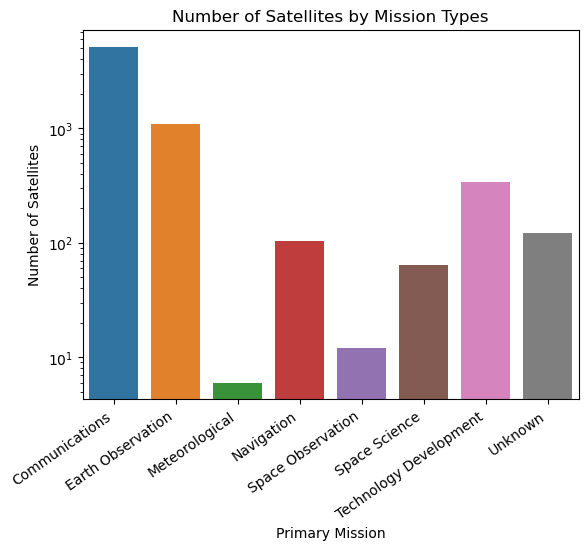

In [131]:
# Bar Chart
msn_order = ['Communications', 'Earth Observation', 'Meteorological', 'Navigation', 'Space Observation','Space Science', 'Technology Development', 'Unknown']
color_palette = {
    'Communications': '#1f77b4',
    'Earth Observation': '#ff7f0e',
    'Meteorological': '#2ca02c',
    'Navigation': '#d62728',
    'Space Observation': '#9467bd',
    'Space Science': '#8c564b',
    'Technology Development': '#e377c2',
    'Unknown': '#7f7f7f'
}

sns.barplot(data=msnfreq_df, x='Primary_Mission', y='SatelliteCount', palette=color_palette, order=msn_order)
plt.yscale('log')
plt.title('Number of Satellites by Mission Types')
plt.ylabel('Number of Satellites')
plt.xlabel('Primary Mission')
plt.xticks(rotation=35, ha='right')
plt.show()

In [82]:
# Split into Separate Bands (AI-assisted)
exploded_df = finalsats_df.assign(Frequency_Band=finalsats_df['Frequency_Band'].str.split('/')).explode('Frequency_Band')

custom_order = ['C', 'Ka', 'Ku', 'L', 'S', 'X', 'Other']
exploded_df['Frequency_Band'] = pd.Categorical(exploded_df['Frequency_Band'], categories=custom_order, ordered=True)
exploded_df

,Satellite_Name,Operator_Country,Orbit,Launch_Site,Launch_Year,Primary_Mission,Frequency_Band,Primary_User
0,1HOPSAT-TD,USA,LEO,Satish Dhawan Space Centre,2019,Earth Observation,X,Commercial
0,1HOPSAT-TD,USA,LEO,Satish Dhawan Space Centre,2019,Earth Observation,S,Commercial
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,LEO,Cape Canaveral,2023,Earth Observation,X,Commercial
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,LEO,Cape Canaveral,2023,Earth Observation,S,Commercial
2,Aalto-1,Finland,LEO,Satish Dhawan Space Centre,2017,Technology Development,S,Civil
...,...,...,...,...,...,...,...,...
7556,Ziyuan 1-2D,China,LEO,Taiyuan Launch Center,2019,Earth Observation,S,Government
7558,Ziyuan 3-2,China,LEO,Taiyuan Launch Center,2016,Earth Observation,X,Government
7558,Ziyuan 3-2,China,LEO,Taiyuan Launch Center,2016,Earth Observation,S,Government
7559,Ziyuan 3-3,China,LEO,Taiyuan Launch Center,2020,Earth Observation,X,Government


C:\Users\thatc\AppData\Local\Temp\ipykernel_15356\2069365567.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




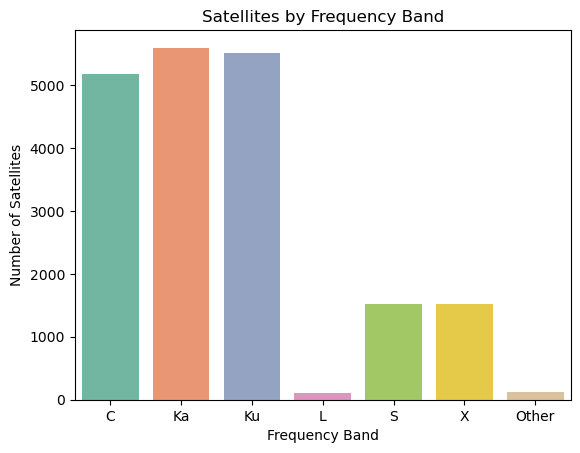

In [83]:

sns.countplot(data=exploded_df, x='Frequency_Band', order=custom_order, palette='Set2')
plt.xlabel('Frequency Band')
plt.ylabel('Number of Satellites')
plt.title('Satellites by Frequency Band')
plt.show()

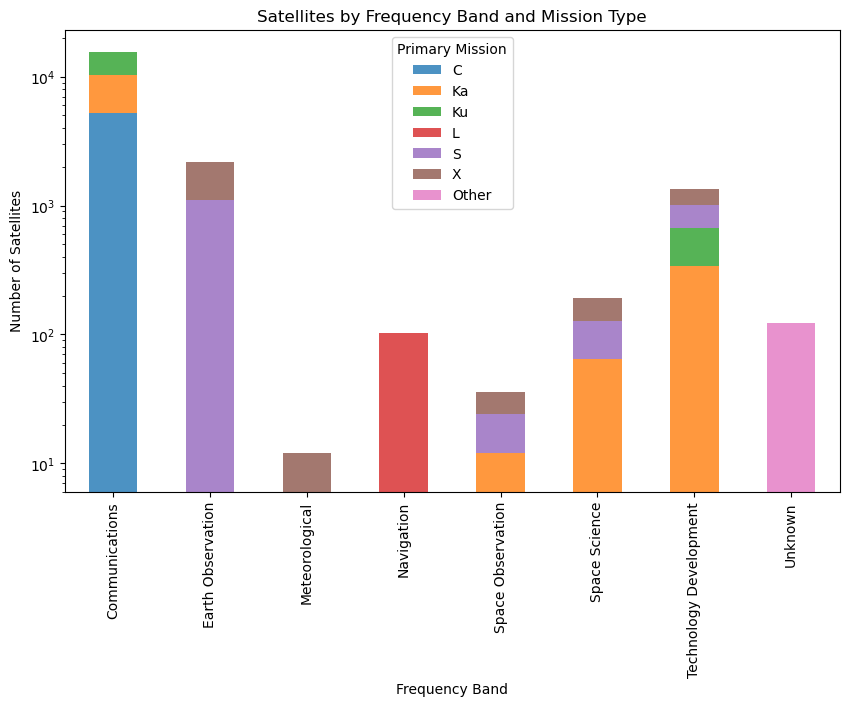

In [84]:
# Stacked Bar Chart
band_mission_counts = pd.crosstab(exploded_df['Primary_Mission'], exploded_df['Frequency_Band'])
band_mission_counts.plot(kind='bar', stacked=True, figsize=(10,6), alpha=0.8)
plt.yscale('log')
plt.xlabel('Frequency Band')
plt.ylabel('Number of Satellites')
plt.title('Satellites by Frequency Band and Mission Type')
plt.legend(title='Primary Mission')
plt.show()

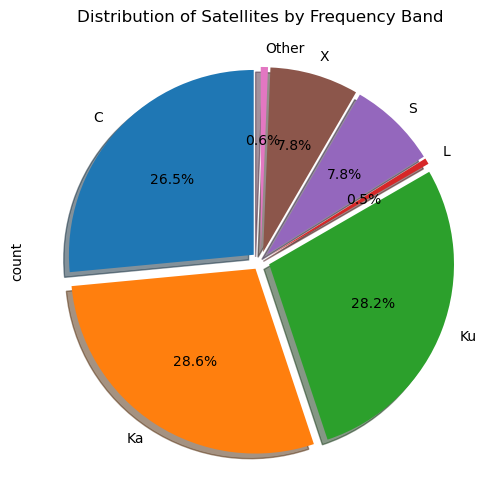

In [85]:
my_colors = ['']
band_counts = exploded_df['Frequency_Band'].value_counts(sort=False)
explode = [0.05] * len(band_counts)
plt.figure(figsize=(6,6))
band_counts.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, explode=explode, labeldistance=1.1)
plt.title('Distribution of Satellites by Frequency Band')
plt.show()

In [86]:
finalsats_df.groupby('Operator_Country').size().sample(50)

Operator_Country
Ukraine                          3
Lithuania                        5
South Africa                     5
Peru                             1
Egypt                            6
Turkmenistan/Monaco              1
Colombia                         2
Bolivia                          1
USA                           4916
Estonia                          1
Indonesia                        6
France/Belgium/Sweden            1
Israel                          23
Singapore                        8
Switzerland                     12
Australia                       19
Mexico                           6
Sinapore                         1
Belgium                          2
Japan                           67
Denmark                          6
Finland                         25
South Korea                     16
Greece/United Kingdom            1
USA/Argentina                    2
Malaysia                         3
USA/Germany                      2
Nepal                            1
Ira

In [87]:
# choropleth
# Explode Countries since Some have multiple operator countries
exploded_country_df = finalsats_df.assign(
    Country=finalsats_df['Operator_Country'].str.split('/')
).explode('Country')
exploded_country_df

# Use replace to fix any country names
exploded_country_df['Country'] = exploded_country_df['Country'].replace({
    'USA': 'United States',
    'Multinational': 'International',
    'ESA': 'International'
})

# Aggregate Country Counts
satellite_counts = exploded_country_df['Country'].value_counts().reset_index()
satellite_counts.columns = ['Country', 'Satellite_Count']
satellite_counts['Log_Satellite_Count'] = np.log10(satellite_counts['Satellite_Count']+1)

# Plot Choropleth
fig = px.choropleth(
    satellite_counts,
    locations='Country',
    locationmode='country names',
    color='Log_Satellite_Count',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title="Log(Number of Satellites per Country)",
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

In [26]:
satellite_counts

,Country,Satellite_Count,Log_Satellite_Count
0,United States,4876,3.688153
1,United Kingdom,626,2.797268
2,China,509,2.707570
3,Russia,96,1.986772
4,International,62,1.799341
...,...,...,...
70,Bangladesh,1,0.301030
71,Azerbaijan,1,0.301030
72,Angola,1,0.301030
73,Austria,1,0.301030


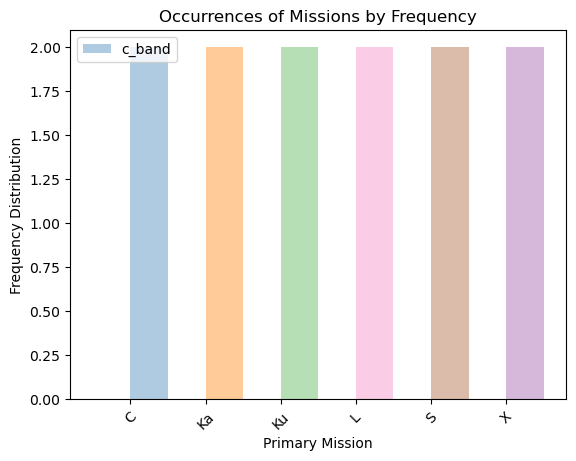

In [27]:
def create_histograms(df):
    c_band = exploded_df[exploded_df['Frequency_Band'] == 'C']
    fig, ax = plt.subplots()
    ax.hist(c_band['Frequency_Band'], color='#377eb8', density=True, alpha=0.4, bins=2)

    ka_band = exploded_df[exploded_df['Frequency_Band'] =='Ka']
    ax.hist(ka_band['Frequency_Band'], color="#ff7f00", density=True, alpha=0.4, bins=2)

    ku_band = exploded_df[exploded_df['Frequency_Band'] =='Ku']
    ax.hist(ku_band['Frequency_Band'], color="#4daf4a", density=True, alpha=0.4, bins=2)

    l_band = exploded_df[exploded_df['Frequency_Band'] =='L']
    ax.hist(l_band['Frequency_Band'], color="#f781bf", density=True, alpha=0.4, bins=2)

    s_band = exploded_df[exploded_df['Frequency_Band'] =='S']
    ax.hist(s_band['Frequency_Band'], color="#a65628", density=True, alpha=0.4, bins=2)

    x_band = exploded_df[exploded_df['Frequency_Band'] =='X']
    ax.hist(x_band['Frequency_Band'], color="#984ea3", density=True, alpha=0.4, bins=2)

    ax.set_xlabel('Primary Mission')
    plt.xticks(rotation=45)
    ax.set_ylabel('Frequency Distribution')
    ax.set_title('Occurrences of Missions by Frequency')
    ax.legend(['c_band', ])

create_histograms(exploded_df)

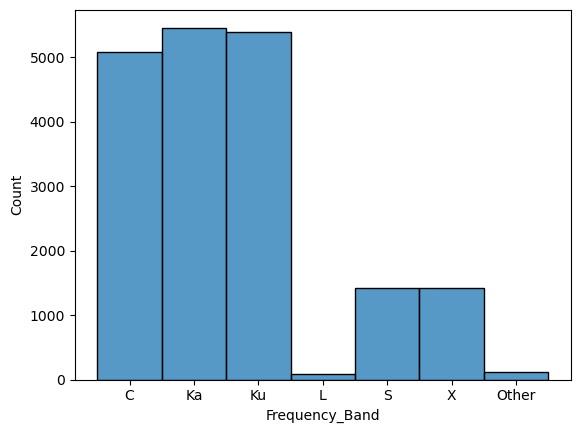

In [28]:
sns.histplot(data=exploded_df['Frequency_Band'])
plt.show()



In [29]:
pip install squarify

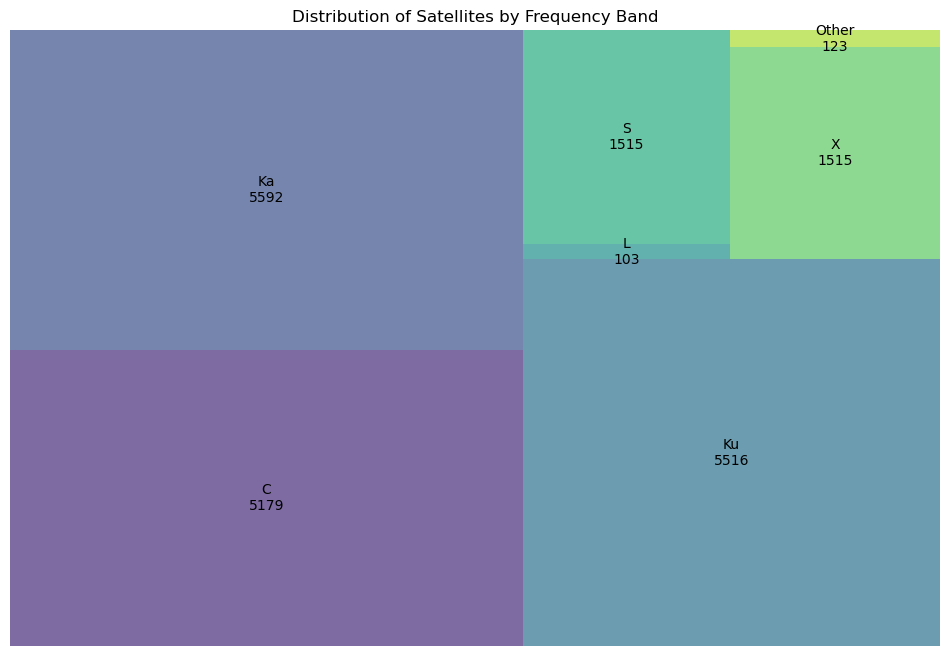

In [88]:
import squarify

# Prepare data
sizes = band_counts.values
labels = [f"{band}\n{count}" for band, count in zip(band_counts.index, band_counts.values)]

# Plot
plt.figure(figsize=(12,8))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=sns.color_palette('viridis', len(sizes)))
plt.axis('off')
plt.title('Distribution of Satellites by Frequency Band')
plt.show()


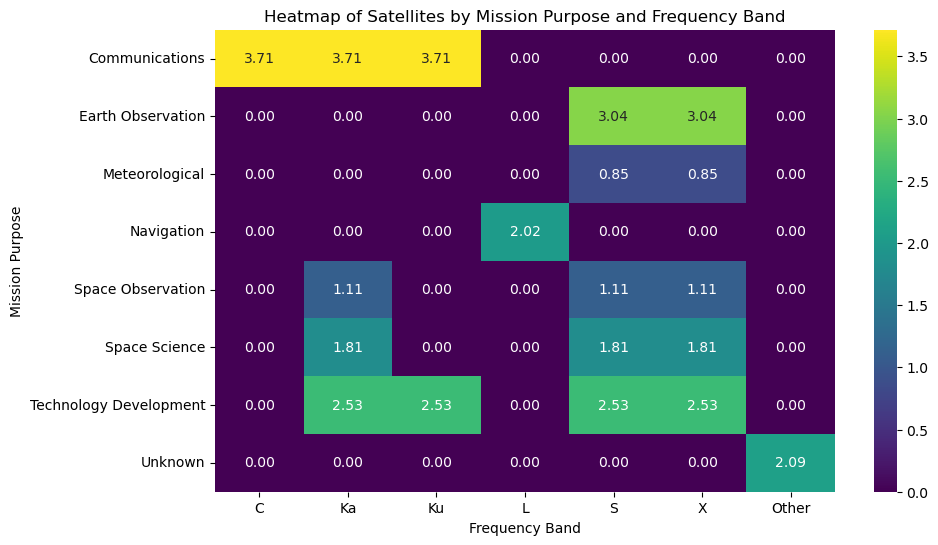

In [132]:
heatmap_data = pd.crosstab(exploded_df['Primary_Mission'], exploded_df['Frequency_Band'])
log_heatmap_data = np.log10(heatmap_data + 1)
plt.figure(figsize=(10,6))
sns.heatmap(log_heatmap_data, annot=True, fmt='.2f', cmap='viridis')
plt.title('Heatmap of Satellites by Mission Purpose and Frequency Band')
plt.xlabel('Frequency Band')
plt.ylabel('Mission Purpose')
plt.show()